# Homework 1

* Ethan E. Lopez
* Yuxin Wen
* CPSC 392
* September 25, 2025

## Step 1

Data Analysis

In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/boutique.csv")
data.head()

,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73
1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73
2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82
3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33
4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35


In [14]:
data.shape

(25000, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25000 non-null  int64  
 1   gender                   25000 non-null  object 
 2   age                      24980 non-null  float64
 3   height_cm                25000 non-null  int64  
 4   waist_size_cm            25000 non-null  int64  
 5   inseam_cm                24800 non-null  float64
 6   test_group               25000 non-null  int64  
 7   salary_self_report_in_k  24985 non-null  float64
 8   months_active            25000 non-null  int64  
 9   num_purchases            25000 non-null  int64  
 10  amount_spent_annual      25000 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.1+ MB


In [16]:
data.describe()

,year,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
count,25000.000000,24980.000000,25000.000000,25000.000000,24800.000000,25000.00000,24985.000000,25000.000000,25000.000000,25000.000000
mean,2020.494720,32.529343,168.028480,94.990640,74.005565,0.50000,67.559163,12.031800,50.246000,792.786324
std,1.123861,8.378003,6.011888,7.040765,2.035485,0.50001,11.571951,6.938927,28.939877,164.844132
min,2019.000000,18.000000,144.000000,68.000000,66.000000,0.00000,23.570000,0.000000,0.000000,49.480000
25%,2019.000000,25.000000,164.000000,90.000000,73.000000,0.00000,59.760000,6.000000,25.000000,683.527500
50%,2020.000000,33.000000,168.000000,95.000000,74.000000,0.50000,67.590000,12.000000,50.000000,796.735000
75%,2022.000000,40.000000,172.000000,100.000000,75.000000,1.00000,75.440000,18.000000,75.000000,906.077500
max,2022.000000,47.000000,194.000000,125.000000,83.000000,1.00000,109.760000,24.000000,100.000000,1384.340000


In [17]:
# Check for null values
display(data.isnull().sum())

,0
year,0
gender,0
age,20
height_cm,0
waist_size_cm,0
inseam_cm,200
test_group,0
salary_self_report_in_k,15
months_active,0
num_purchases,0


In [18]:
initial_rows = data.shape[0]
data_cleaned = data.dropna()
rows_after_drop = data_cleaned.shape[0]

percentage_lost = ((initial_rows - rows_after_drop) / initial_rows) * 100

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping null values: {rows_after_drop}")
print(f"Percentage of data lost: {percentage_lost:.2f}%")

Initial number of rows: 25000
Number of rows after dropping null values: 24767
Percentage of data lost: 0.93%


## Step 2

Modeling

In [19]:
# drop missing values and reset indices
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [20]:
# Check for null values
display(data.isnull().sum())

,0
year,0
gender,0
age,0
height_cm,0
waist_size_cm,0
inseam_cm,0
test_group,0
salary_self_report_in_k,0
months_active,0
num_purchases,0


In [21]:
data.shape

(24767, 11)

In [22]:
categorical_features = [ "test_group","gender"]
onehot=OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot.fit_transform(data[categorical_features])
# Convert to a DataFrame for easier interpretation
encoded_df = pd.DataFrame(one_hot_encoded, columns=onehot.get_feature_names_out([ "test_group","gender"]))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([data, encoded_df], axis=1)

df_encoded.head()

,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual,test_group_0,test_group_1,gender_man,gender_nonbinary,gender_other,gender_woman
0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73,1.0,0.0,0.0,0.0,0.0,1.0
1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73,1.0,0.0,1.0,0.0,0.0,0.0
2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82,1.0,0.0,0.0,0.0,0.0,1.0
3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33,1.0,0.0,0.0,0.0,0.0,1.0
4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df_encoded.shape

(24767, 17)

In [24]:
df_encoded=df_encoded.drop(columns=["test_group", "gender"])
df_encoded.head()

,year,age,height_cm,waist_size_cm,inseam_cm,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual,test_group_0,test_group_1,gender_man,gender_nonbinary,gender_other,gender_woman
0,2020,34.0,168,98,75.0,69.83,21,89,729.73,1.0,0.0,0.0,0.0,0.0,1.0
1,2020,28.0,168,88,76.0,61.39,7,32,621.73,1.0,0.0,1.0,0.0,0.0,0.0
2,2021,18.0,170,95,75.0,80.55,2,25,820.82,1.0,0.0,0.0,0.0,0.0,1.0
3,2021,43.0,167,97,75.0,82.98,4,89,880.33,1.0,0.0,0.0,0.0,0.0,1.0
4,2021,29.0,173,89,74.0,62.00,5,95,690.35,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Define features (X) and target (y) using df_encoded, excluding 'year'
X = df_encoded.drop(['amount_spent_annual', 'year'], axis=1)
y = df_encoded['amount_spent_annual']

# TRAIN TEST SPLIT MODEL VALIDATION with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify continuous features - all features in X are now numerical after one-hot encoding
continuous_features = X.columns.tolist()

# Create preprocessing pipeline for continuous features (Z-scoring)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features)
    ],
    remainder='passthrough' # Keep any remaining columns (none in this case after selecting all)
)

# Build three models with an 80/20 split and sklearn Pipelines

# Model 1: Linear Regression
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Model 2: Polynomial Regression with degree=2
model_poly2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
                              ('regressor', LinearRegression())])

# Model 3: Polynomial Regression with degree=3 and interaction only
model_poly3_interaction = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('polynomial', PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)),
                                          ('regressor', LinearRegression())])

# Now you can fit the models:
model_lr.fit(X_train, y_train)
model_poly2.fit(X_train, y_train)
model_poly3_interaction.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_cm',
                                                   'waist_size_cm', 'inseam_cm',
                                                   'salary_self_report_in_k',
                                                   'months_active',
                                                   'num_purchases',
                                                   'test_group_0',
                                                   'test_group_1', 'gender_man',
                                                   'gender_nonbinary',
                                                   'gender_other',
                                                   'gender_woman'])])),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=True)),
                ('regressor', LinearRegression())])

In [26]:
# calculate the MSE, MAE, MAPE, and  𝑅2  for both the training and testing sets of all models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero if y_true contains zero values
    # A small epsilon is added to the denominator to prevent this issue
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100


# Calculate metrics for each model on training and testing sets
models = {
    "Linear Regression": model_lr,
    "Polynomial Regression (Degree 2)": model_poly2,
    "Polynomial Regression (Degree 3, Interaction)": model_poly3_interaction
}

results = {}

for name, model in models.items():
    # Predictions on training set
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)


    # Predictions on testing set
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)



    results[name] = {
        'Training MSE': mse_train,
        'Testing MSE': mse_test,
        'Training MAE': mae_train,
        'Testing MAE': mae_test,
        'Training MAPE': mape_train,
        'Testing MAPE': mape_test,
        'Training R^2': r2_train,
        'Testing R^2': r2_test,


    }

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

,Training MSE,Testing MSE,Training MAE,Testing MAE,Training MAPE,Testing MAPE,Training R^2,Testing R^2
Linear Regression,15385.643379,15354.246532,97.886353,97.847642,13.936046,13.908033,0.430910,0.443697
Polynomial Regression (Degree 2),5511.632294,5549.178675,59.643835,60.038589,7.996649,8.096083,0.796134,0.798946
"Polynomial Regression (Degree 3, Interaction)",15045.271072,15419.026292,96.999038,97.841398,13.741851,13.904475,0.443500,0.441350


## Step 3

Questions

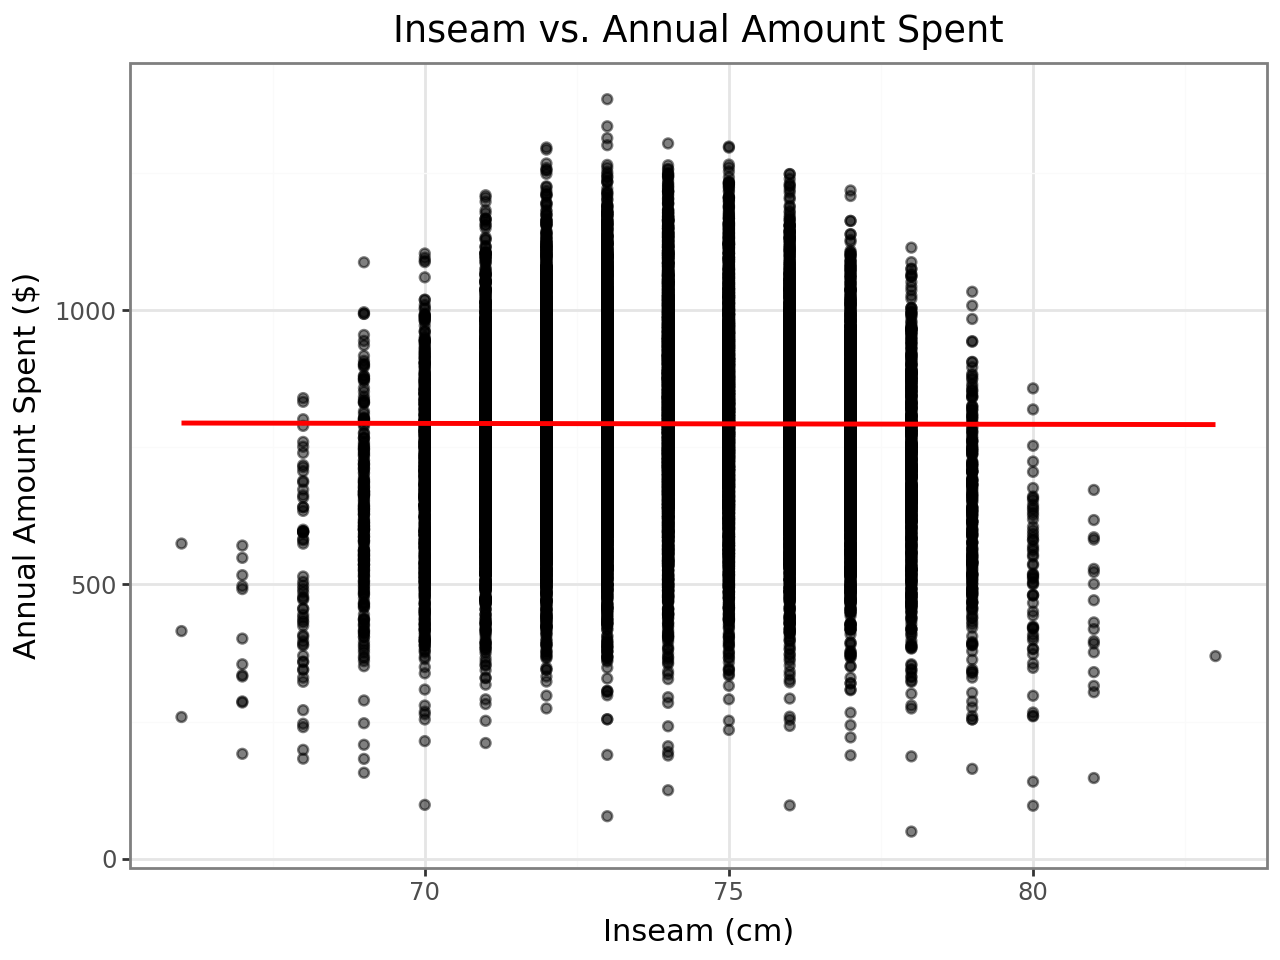

In [27]:
# 4. People who are not your "average" size often find it difficult to buy clothes in traditional stores
# Is there a relationship between inseam and amount spent in the store annually?

# Scatterplot of inseam vs. amount spent annually
plot_inseam_amount = (ggplot(data, aes(x='inseam_cm', y='amount_spent_annual')) +
                      geom_point(alpha=0.5) +
                      theme_bw() + geom_smooth(method="lm", se=False, color="red") +
                      labs(title='Inseam vs. Annual Amount Spent',
                           x='Inseam (cm)',
                           y='Annual Amount Spent ($)'))

# Display the plot
plot_inseam_amount

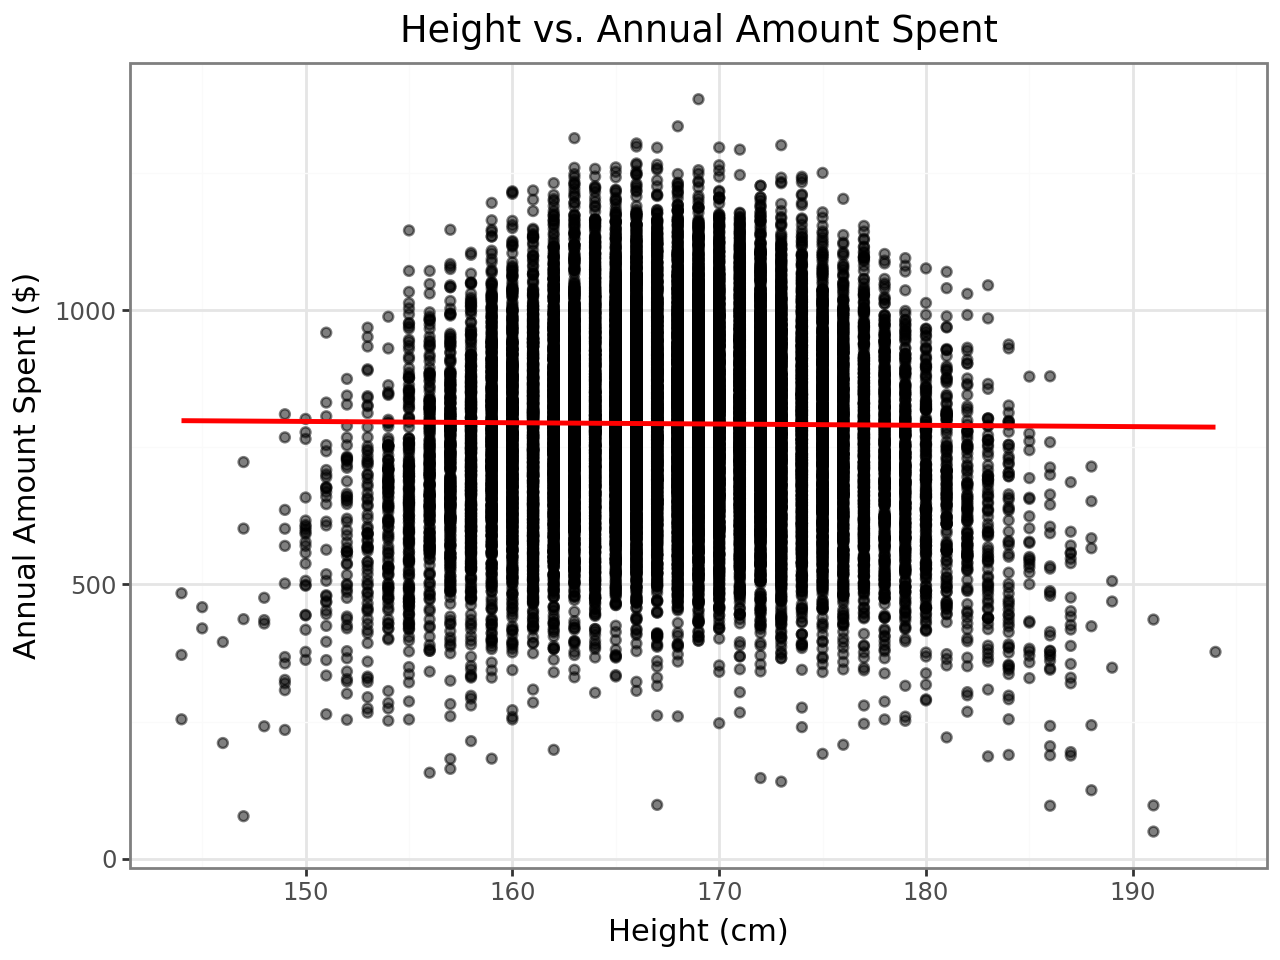

In [28]:
# Is there a relationship between height and amount spent in the store annually?

# Scatterplot of height vs. amount spent annually
plot_height_amount = (ggplot(data, aes(x='height_cm', y='amount_spent_annual')) +
                      geom_point(alpha=0.5) +
                      theme_bw() + geom_smooth(method="lm", se=False, color="red") +
                      labs(title='Height vs. Annual Amount Spent',
                           x='Height (cm)',
                           y='Annual Amount Spent ($)'))

# Display the plot
plot_height_amount

In [29]:
# 5. The store is interested in whether their customer base has changed over time
# Present the minimum, maximum, and average height, waist size, and inseam for each year

# Calculate the mean height, waist size, and inseam for each year
average_measurements_by_year = data.groupby('year')[['height_cm', 'waist_size_cm', 'inseam_cm']].mean().reset_index()

# Display the results
display(average_measurements_by_year)

,year,height_cm,waist_size_cm,inseam_cm
0,2019,167.958479,94.959746,73.987322
1,2020,168.030669,95.096248,74.004241
2,2021,168.027714,94.917350,73.994752
3,2022,168.095842,95.012843,74.038690


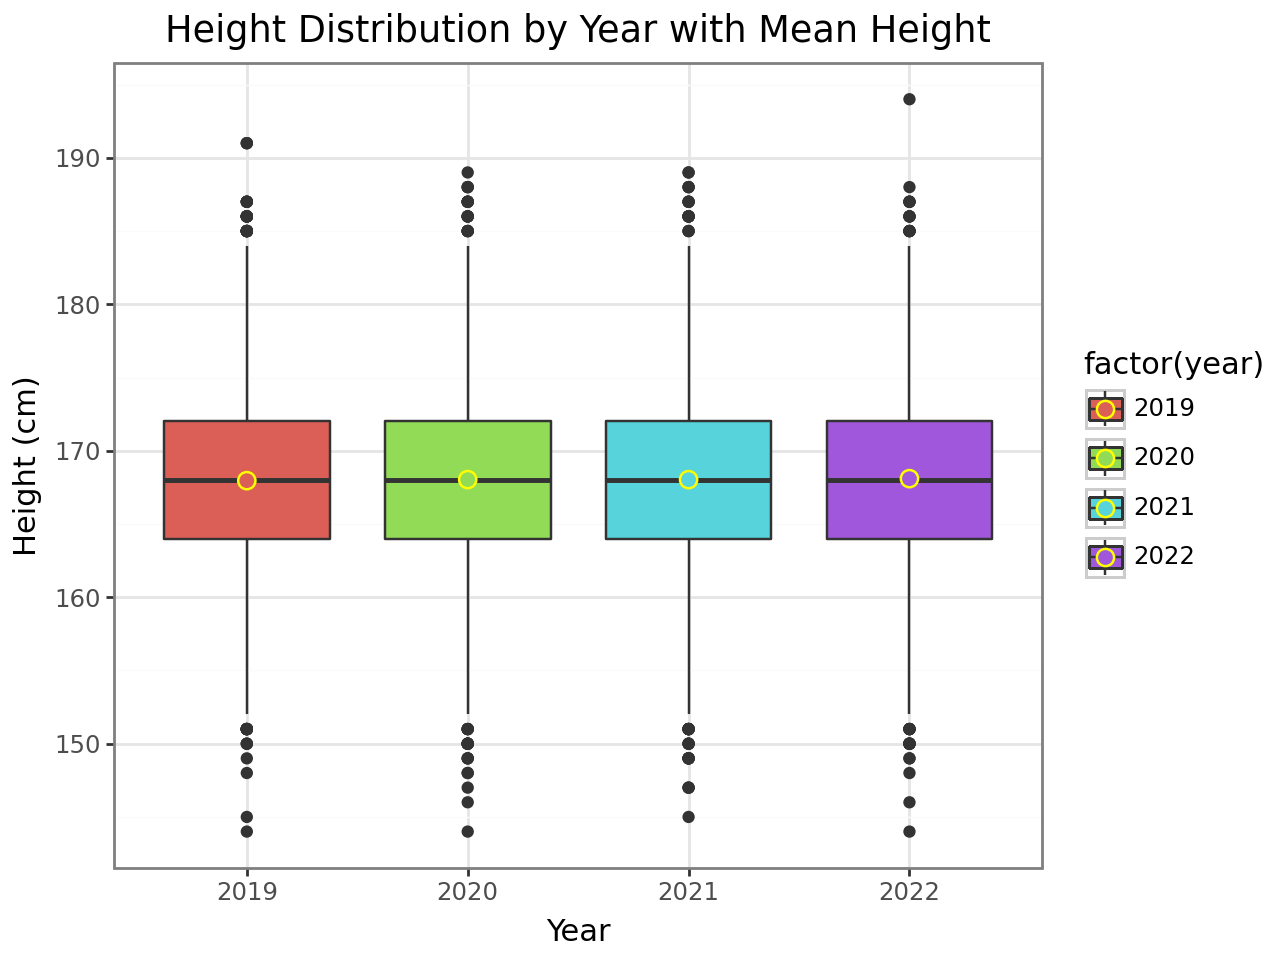

In [30]:
# Boxplot of height by year
plot_height_by_year = (ggplot(data, aes(x='factor(year)', y='height_cm', fill="factor(year)")) +
                       geom_boxplot() +
                       geom_point(data=average_measurements_by_year, mapping=aes(x='factor(year)', y='height_cm'), color='yellow', size=3) +
                       theme_bw() +
                       labs(title='Height Distribution by Year with Mean Height',
                            x='Year',
                            y='Height (cm)'))

# Display the plot
plot_height_by_year

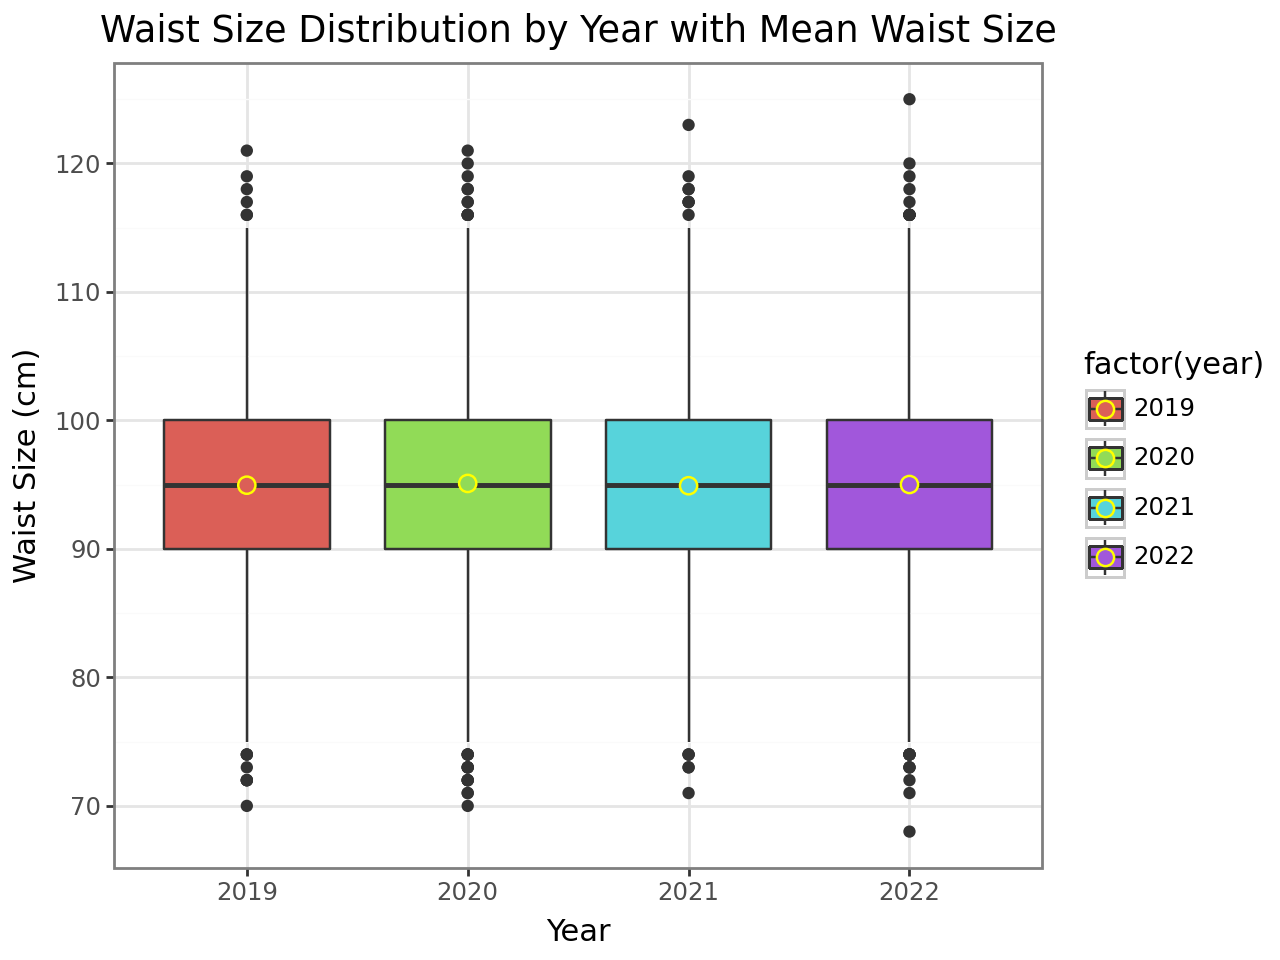

In [31]:
# Boxplot of waist size by year
plot_waist_by_year = (ggplot(data, aes(x='factor(year)', y='waist_size_cm', fill="factor(year)")) +
                       geom_boxplot() +
                       geom_point(data=average_measurements_by_year, mapping=aes(x='factor(year)', y='waist_size_cm'), color='yellow', size=3) +
                       theme_bw() +
                       labs(title='Waist Size Distribution by Year with Mean Waist Size',
                            x='Year',
                            y='Waist Size (cm)'))

# Display the plot
plot_waist_by_year

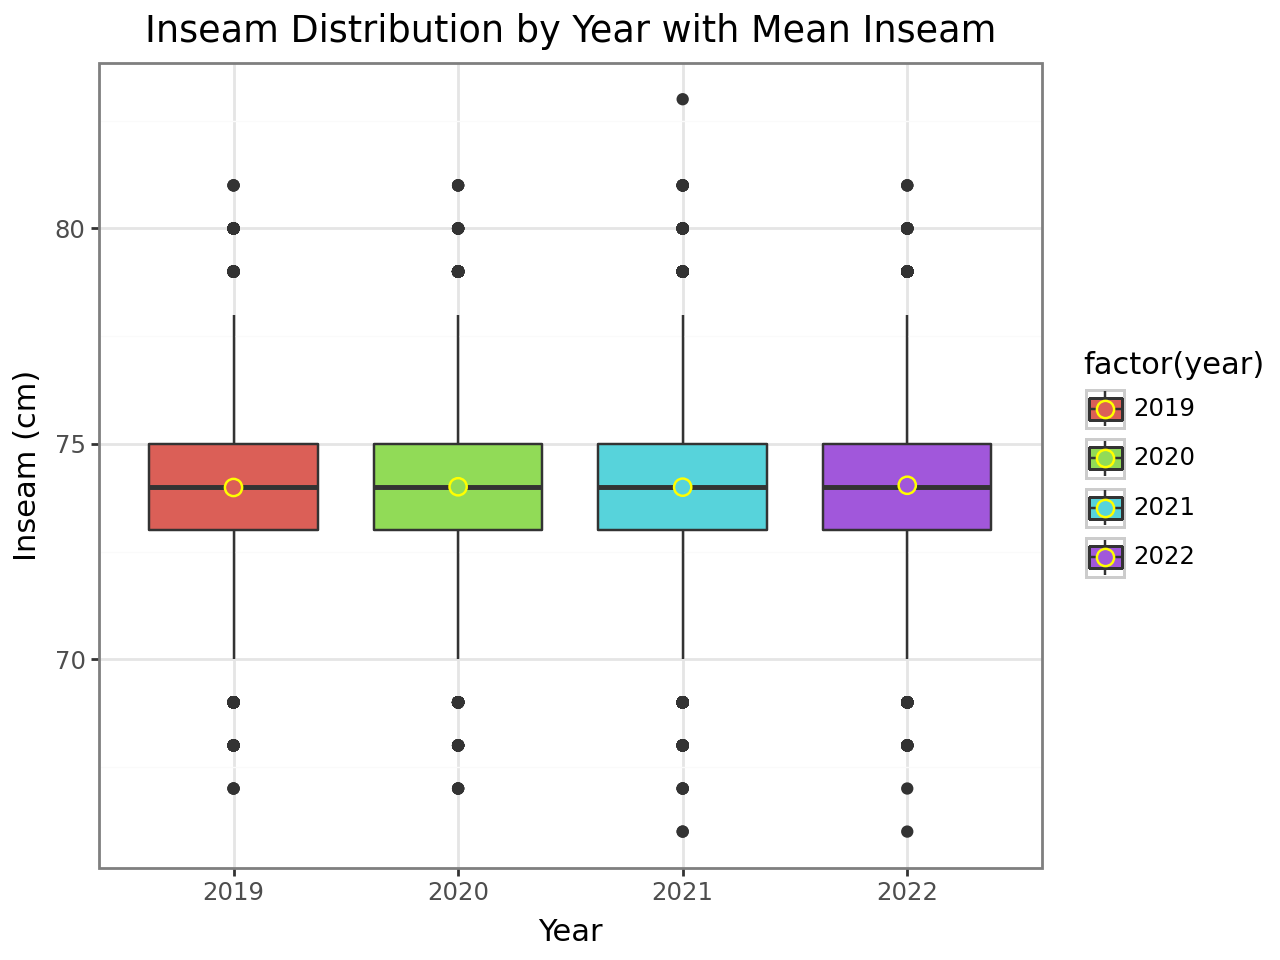

In [32]:
# Boxplot of inseam by year
plot_inseam_by_year = (ggplot(data, aes(x='factor(year)', y='inseam_cm', fill="factor(year)")) +
                       geom_boxplot() +
                       geom_point(data=average_measurements_by_year, mapping=aes(x='factor(year)', y='inseam_cm'), color='yellow', size=3) +
                       theme_bw() +
                       labs(title='Inseam Distribution by Year with Mean Inseam',
                            x='Year',
                            y='Inseam (cm)'))

# Display the plot
plot_inseam_by_year